In [1]:
import glob
import pandas as pd
from datetime import datetime

# Functions

In [2]:
def process_a_json_heart_rate_file(Filename):
    
    df=pd.read_json(Filename)
    
    df['Date'] = pd.to_datetime(df['dateTime']).dt.date
    df['Time'] = pd.to_datetime(df['dateTime']).dt.time
    
    # An inefficient way to decode the 'value' dictionary into a dataframe
    # "pd.DataFrame.from_dict(df['value'])" did not work but should be reveiwed
    
    new=pd.Series(len(df)) 
    for i in range(len(df)):
        new.loc[i]=df.loc[i]['value']['confidence']
    df['confidence'] = pd.Series( new,index=df.index)
    for i in range(len(df)):
        new.loc[i]=df.loc[i]['value']['bpm']
    df['BPM'] = pd.Series( new,index=df.index)
    
    # Remove initial, final and some other low-confidnece readings
    # Then re-index to prevent problems

    df=df[df[:]['confidence']>1]  
    df=df.reindex()                
    
    # Calculate final results and return them and the DataFrame
    
    Date=df.iloc[0]['Date'] # Assumes that this json is for a single date
    Duration= datetime.combine( Date, df['Time'].max() ) - datetime.combine( Date,df['Time'].min() )
    MeanBPM=round(df['BPM'].mean(),0)
    
    return df, Duration, MeanBPM

# Main

In [3]:
files=glob.glob("FITBIT\heart_rate*.json")

len(files)

293

# Process

In [4]:
start_late=270      # Dont start from the first file
n=20                # Process and then plot n files

DFs=[]
SummaryStrings=[]

for i in range(n): 
    df, Duration, MeanBPM = process_a_json_heart_rate_file(files[start_late+i])
    print(i,Duration,MeanBPM)
    SummaryStrings.append( str( df.iloc[0]['Date']) + '    Duration: ' + str(Duration) + ' MeanBPM:' + str(MeanBPM) )  
    DFs.append(df)

0 4:00:25 104.0
1 0:03:40 103.0
2 1:31:59 104.0
3 7:58:44 102.0
4 0:19:36 130.0
5 0:44:37 119.0
6 6:02:19 110.0
7 0:44:37 105.0
8 0:44:39 117.0
9 1:24:56 106.0
10 8:03:12 114.0
11 4:36:38 100.0
12 1:05:33 99.0
13 2:35:39 114.0
14 0:20:57 103.0
15 6:48:30 119.0
16 1:24:08 110.0
17 3:51:40 105.0
18 3:51:23 98.0
19 0:52:45 101.0


# Plot

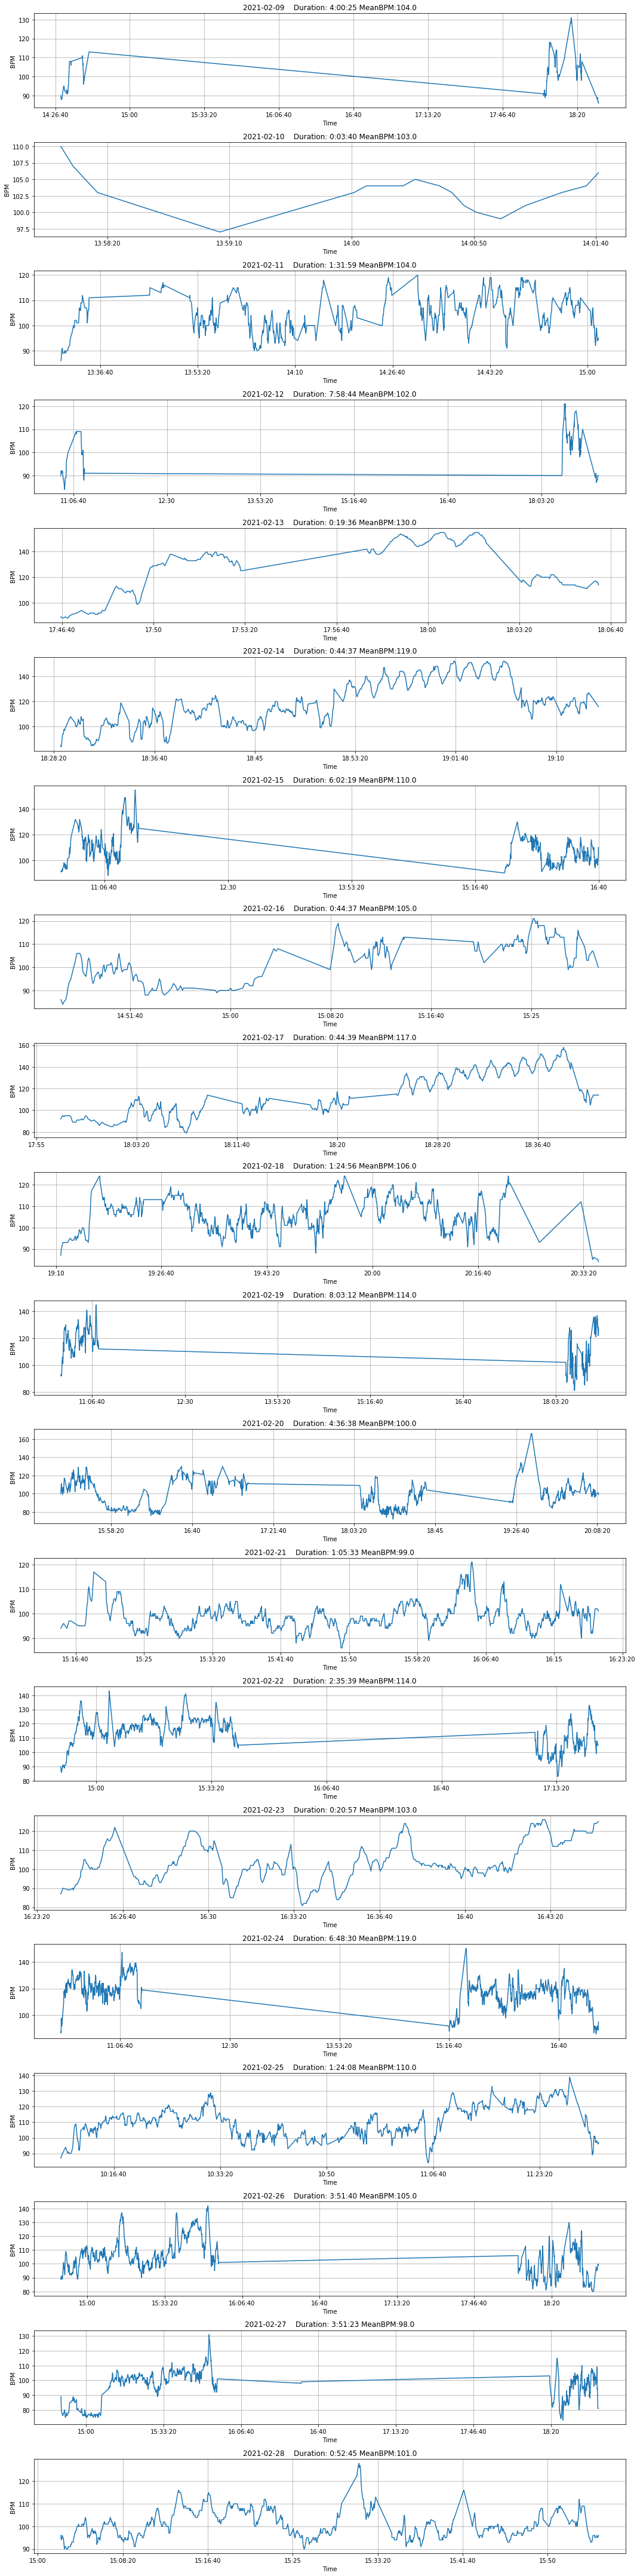

In [6]:
# From: https://matplotlib.org/stable/gallery/lines_bars_and_markers/cohere.html
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=n, ncols=1, figsize=(15, 3*n) )

for i in range(n):
    df=DFs[i]
    #print('\n',i,'\n',df)
    axs[i].plot(df['Time'], df['BPM'])
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('BPM')
    axs[i].set_title( SummaryStrings[i] )
    axs[i].grid(True)

fig.tight_layout()
plt.show()